# WeGo Public Transit
[WeGo Public Transit](https://www.wegotransit.com/) is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

The data for this project can be downloaded from [here](https://drive.google.com/file/d/1iM4WjC9k3EXHPNc6q4AwDh_MEIpXvfMD/view?usp=sharing).

In this project, you'll be analyzing the bus spacing to look for patterns and try to identify correlations to controllable or external factors. Specifically, you'll be using a dataset containing information on the headway, or amount of time between vehicle arrivals at a stop. 

There are two main variables you will be studying in this project, headway deviation and adherence.

**<u>Headway</u>** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the <u>SCHEDULED_HDWY</u> column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop. This dataset contains a column <u>HDWY_DEV</u>, which shows the amount of deviation from the scheduled headway. 

**<u>Bunching</u>** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. 

**<u>Gapping</u>** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

Another important variable is **<u>adherence</u>**, which compares the actual departure time to the scheduled time and is included in the ADHERENCE column. A negative adherence value means that a bus left a time point late and a positive adherence indicates that the bus left the time point early. Buses with adherence values beyond negative 6 are generally considered late and beyond positive 1 are considered early. However, there is some additional logic where the staff applies waivers to allow early departures, such as an express bus that has already picked up everyone at a park-and-ride lot and is only dropping people off at the remaining stops, and also allows for early timepoint records for all records where TRIP_EDGE = 2 (end of trip), since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. 

**Note:** When determining whether a bus is early or late, it is advised that you use the 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', and 'ADJUSTED_ONTIME_COUNT' columns in order to account for the adjustments.

5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego_df = pd.read_csv('../data/Headway Data, 8-1-2023 to 9-30-2023.csv')
wego_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [3]:
q5_df = wego_df[['ADHERENCE', 'HDWY_DEV']]
q5_df.fillna(0, inplace=True)
q5_df

C:\Users\Sean\AppData\Local\Temp\ipykernel_20376\1405979153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5_df.fillna(0, inplace=True)


,ADHERENCE,HDWY_DEV
0,-2.133333,0.000000
1,-2.450000,0.000000
2,-0.933333,0.000000
3,6.283333,0.000000
4,-1.583333,0.000000
...,...,...
350324,-8.433333,5.266666
350325,-11.300000,0.000000
350326,-4.316666,1.866666
350327,-22.083333,17.500000


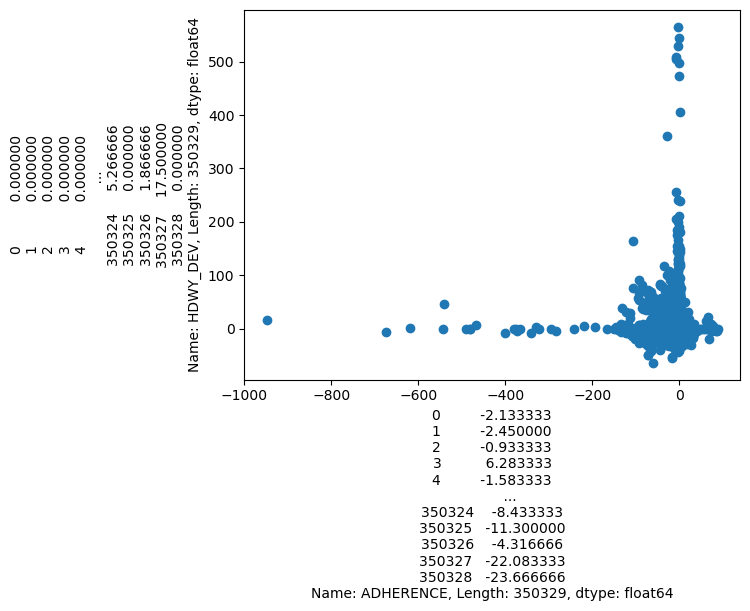

In [4]:
plt.scatter(q5_df['ADHERENCE'], q5_df['HDWY_DEV'])
plt.xlabel(q5_df['ADHERENCE'])
plt.ylabel(q5_df['HDWY_DEV'])
plt.show()